In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np 
import pandas as pd
import math
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}

In [2]:
#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 


#Calculo de lambda2 para red compleja en anillo
def lambda2_para_RCaAnillo(N, K):
    suma = 0
    for j in range(1,(K//2)+1):
        suma = suma + math.sin((j*math.pi)/N)**2
    lambda2 = -4*suma
    return lambda2



#Esta funcion crea una Red Topologia regular con acopalmiento circular conectando cada nodo a sus k/2 vecinos mas cercanos
def create_network(n, k):
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    return G



La matriz de acoplamiento es:
[[-6.  0.  0. ...  0.  1.  1.]
 [ 0. -3.  0. ...  0.  0.  0.]
 [ 0.  0. -3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -5.  0.  1.]
 [ 1.  0.  0. ...  0. -5.  0.]
 [ 1.  0.  0. ...  1.  0. -4.]]
El coeficiente de agrupamiento promedio es: 0.047523809523809524
El promedio del camino mas corto es: 2.8848979591836734
Los valores propios son:
[2.02580699912081e-15, -0.7328449164921917, -0.840358305934005, -0.8913643167117123, -1.0440503566758688, -1.141545549664107, -1.2864847733615006, -1.3700061652569964, -1.4319036542436765, -1.618443767108495, -1.8027338722681987, -1.994688693685813, -2.057094415095825, -2.164627577684992, -2.327404990551461, -2.440251014318303, -2.5135610651360816, -2.5962377062082727, -2.668715785706395, -2.7940141437719483, -2.995672642493, -3.1382973721761225, -3.419764479131643, -3.4903998975711934, -3.6711524186740254, -3.7721229230896447, -4.0379575124092675, -4.218590240544603, -4.350894999982635, -4.552985171629831, -4.78457282374095

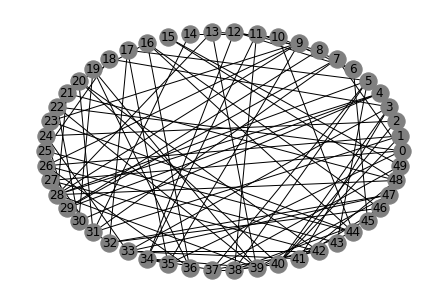

In [3]:
#Parametros de configuracion de la red.
n, k, p = 50, 2, 0.9
#Modifica la red a partir del algoritmo de Watts - Strogatz
G = nx.watts_strogatz_graph(n, 2*k, p)
nx.draw_circular(G,**opts)
ma = matriz_acoplaminento(G)

print("La matriz de acoplamiento es:")
print(ma)

#Exporta la matriz de acoplamiento a matlab
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
#---------

print("El coeficiente de agrupamiento promedio es:",nx.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))

#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
print(vp)
print("El valor propio Lamda2 es:")
print(vp[1])
print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)


